In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline

In [2]:
#1
if __name__ == '__main__':

    # Load Data
    df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv')
    #df.info()
    
    df_new = df.sort_values(['submission_date'],ascending = False, inplace = True)
    df_new = df["submission_date"].max()
    #df.submission_date.head()
    df_new = df.drop_duplicates(subset=['state']) #instance with dropped duplicates states
    
    #df_new.info()
    #df_new.state.head(60)
    

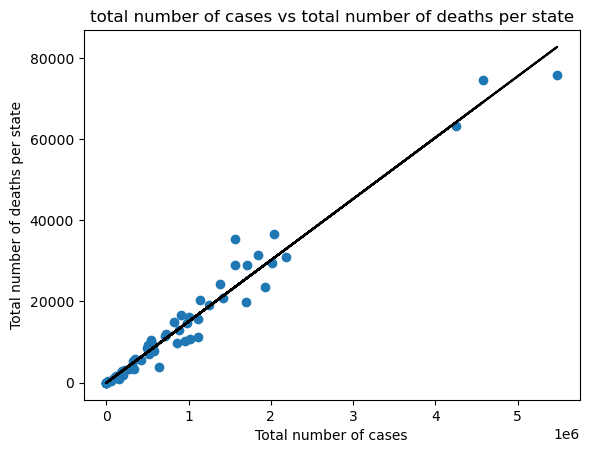

In [11]:
#2,A #linear regression

m,b = np.polyfit(df_new.tot_cases,df_new.tot_death,deg=1)
z = [float(entry)*m+b for entry in df_new.tot_cases]
    
#plotting
plt.plot(df_new.tot_cases,z,color='black')
    
#plot total number of cases vs total number of deaths per state
plt.scatter(df_new.tot_cases, df_new.tot_death)
    
#labels
plt.xlabel('Total number of cases')
plt.ylabel('Total number of deaths per state')
plt.title('total number of cases vs total number of deaths per state linear regres')
plt.show()

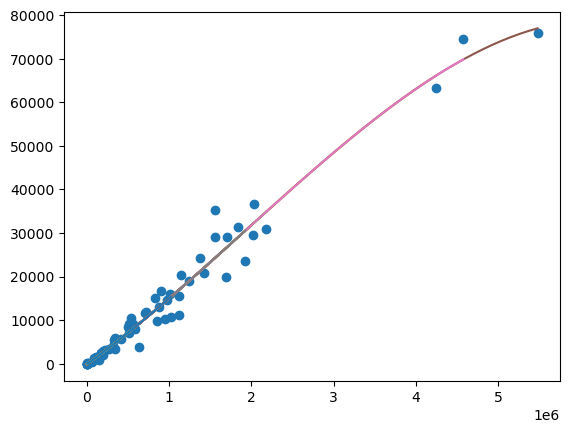

In [13]:
#polynimal regression
#2b
x = df_new.tot_cases
y = df_new.tot_death
coefficients = np.polyfit(x, y, 3)
poly = np.poly1d(coefficients)
    
new_x = np.linspace(x,y)
new_y = poly(new_x)
    
#plt.figure(2)
plt.plot(x, y, "o", new_x, new_y);

plt.xlabel('Total number of cases')
plt.ylabel('Total number of deaths per state')
plt.title('total number of cases vs total number of deaths per state polynomial regres')
plt.show()

In [187]:
#3 Plot the number of new cases per state corresponding to the most recent day, in descending order. 

df_states = df.drop_duplicates(subset=['state']);
df_states.sort_values(by='submission_date',inplace=True);
new = df_states.sort_values(by = 'new_case',ascending=False);

/var/folders/95/l1500c191kj7q22yqnkf0h1r0000gn/T/ipykernel_41233/3435647055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states.sort_values(by='submission_date',inplace=True);


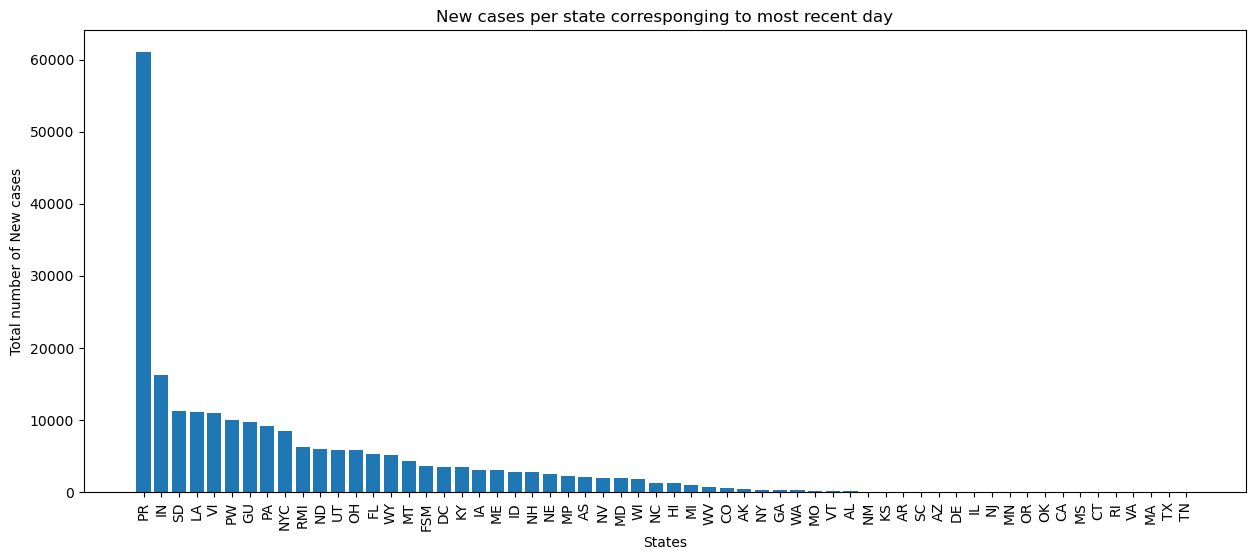

In [188]:
#change figure size
fig = plt.figure(figsize=(15, 6))

#rotate axis labels 
plt.xticks(rotation = 90)
        
#plt.bar(df_states.new_case,df_states.submission_date)
plt.bar(df_states.state,new.new_case)

plt.xlabel('States')
plt.ylabel('Total number of New cases')
plt.title('New cases per state corresponging to most recent day')
plt.show()

In [207]:
#4. Consider data for the following states: Washington, Kentucky, Georgia, and California. 
#a) Plot new cases over time. 
#b) Plot total cases over time.  
#c) Find population count for each state and normalize new cases data and total cases data. 
#   Replot a) and b).  
#d) Discuss the results. 


#Washington, Kentucky, Georgia, and California
states = ['WA', 'KY', 'GA', 'CA']
#df_states = df.drop_duplicates(subset=['state']);
df_states.sort_values(by='submission_date',inplace=True)
df_s = df_states[df_states['state'].isin(states)]


/var/folders/95/l1500c191kj7q22yqnkf0h1r0000gn/T/ipykernel_41233/4213529578.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_states.sort_values(by='submission_date',inplace=True)


In [211]:
#df

/var/folders/95/l1500c191kj7q22yqnkf0h1r0000gn/T/ipykernel_41233/3601001846.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df_s.groupby(['state', 'submission_date']).sum().reset_index()


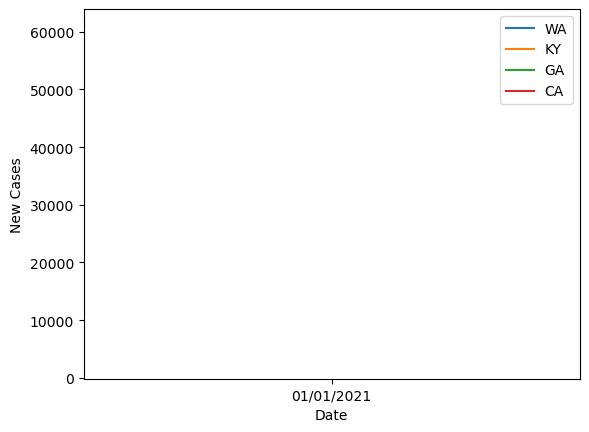

In [212]:
# Group the data by state and date

#new cases over time
grouped = df_s.groupby(['state', 'submission_date']).sum().reset_index()

# Plot the data for each state
for state in states:
    subset = grouped[grouped['state'] == state]
    plt.plot(subset['submission_date'], subset['new_case'], label=state)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()

/var/folders/95/l1500c191kj7q22yqnkf0h1r0000gn/T/ipykernel_41233/2962988041.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_2 = df_s.groupby(['state', 'submission_date']).sum().reset_index()


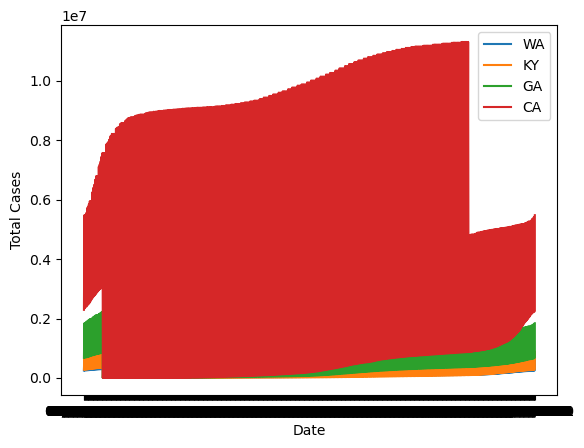

In [120]:
#total cases over time

# Group the data by state and date
grouped_2 = df_s.groupby(['state', 'submission_date']).sum().reset_index()

# Plot the data for each state
for state in states:
    subset = grouped_2[grouped_2['state'] == state]
    plt.plot(subset['submission_date'], subset['tot_cases'], label=state)

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()